In [2]:
import pandas as pd
import tensorflow as tf
from scipy import stats
import cv2
import pickle
import numpy as np

import matplotlib.pyplot as plt

from utils import *

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Initialize the perceptnet-autoencoder model and load the weights. Also load the training history.

In [4]:
model_dim_reduction = PerceptNetAutoEncoder(kernel_initializer = 'identity', gdn_kernel_size = 1)
model_dim_reduction.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = None)
model_dim_reduction.build(input_shape = (None, 384, 512, 3))
model_dim_reduction.load_weights('../models/dim_reduction_123.h5')

history_model_dim_reduction = {}
with open(f'../histories/dim_reduction_123.pkl', 'rb') as f1:
    history_model_dim_reduction = pickle.load(f1)

Plot the training history. Right column is in log-y.

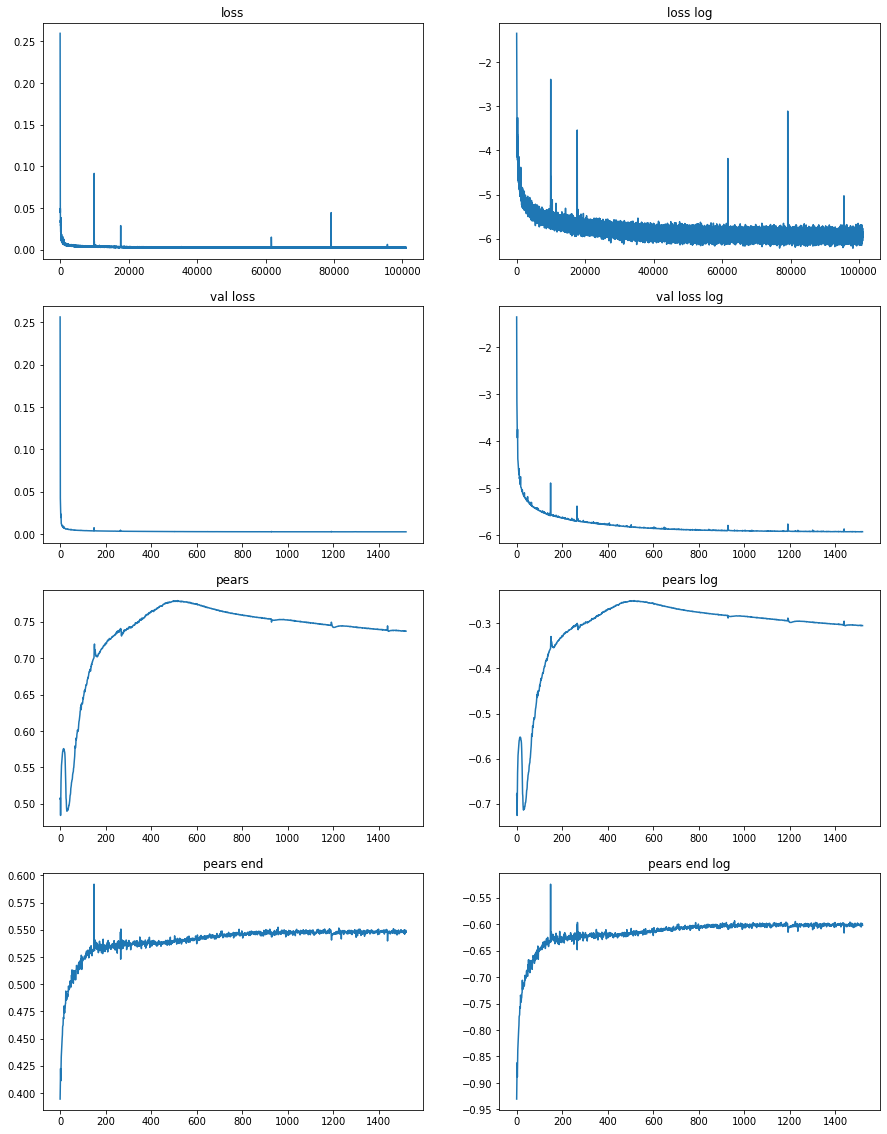

In [5]:
plt.figure(figsize=(15,20))
plt.subplot(421)
plt.plot(np.array(history_model_dim_reduction['train_loss'])**2)
plt.title('loss')
plt.subplot(422)
plt.plot(np.log(np.array(history_model_dim_reduction['train_loss'])**2))
plt.title('loss log')
plt.subplot(423)
plt.plot(np.array(history_model_dim_reduction['val_loss'])**2)
plt.title('val loss')
plt.subplot(424)
plt.plot(np.log(np.array(history_model_dim_reduction['val_loss'])**2))
plt.title('val loss log')
plt.subplot(425)
plt.plot(np.abs(np.array(history_model_dim_reduction['correlations_middle'])))
plt.title('pears')
plt.subplot(426)
plt.plot(np.log(np.abs(np.array(history_model_dim_reduction['correlations_middle']))))
plt.title('pears log')
plt.subplot(427)
plt.plot(np.abs(np.array(history_model_dim_reduction['correlations_end'])))
plt.title('pears end')
plt.subplot(428)
plt.plot(np.log(np.array(np.abs(history_model_dim_reduction['correlations_end']))))
plt.title('pears end log')
plt.show()

Load the data to check how good is the reconstruction of the autoencoder.

In [6]:
path = '/lustre/ific.uv.es/ml/uv075/Databases/imagenet_images'

def normalize(image):
    return tf.cast(image/255., tf.float32)

val_ds = tf.keras.utils.image_dataset_from_directory(path,
                                                     labels = None,
                                                     seed = 123,
                                                     image_size = (256, 256),
                                                     batch_size = 16,
                                                     crop_to_aspect_ratio = True,
                                                     shuffle = True,
                                                     validation_split = 0.2,
                                                     subset = 'validation').take(1)

val_ds = val_ds.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

print(val_ds)

Found 202050 files belonging to 1 classes.
Using 40410 files for validation.
<ParallelMapDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>


Prediction of one validation batch images.

In [8]:
val_images = val_ds.get_single_element()
preds_dim_reduction = model_dim_reduction.predict(val_images)

1/1 [==============================] - 0s 213ms/step


Plot the real and the reconstructed images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


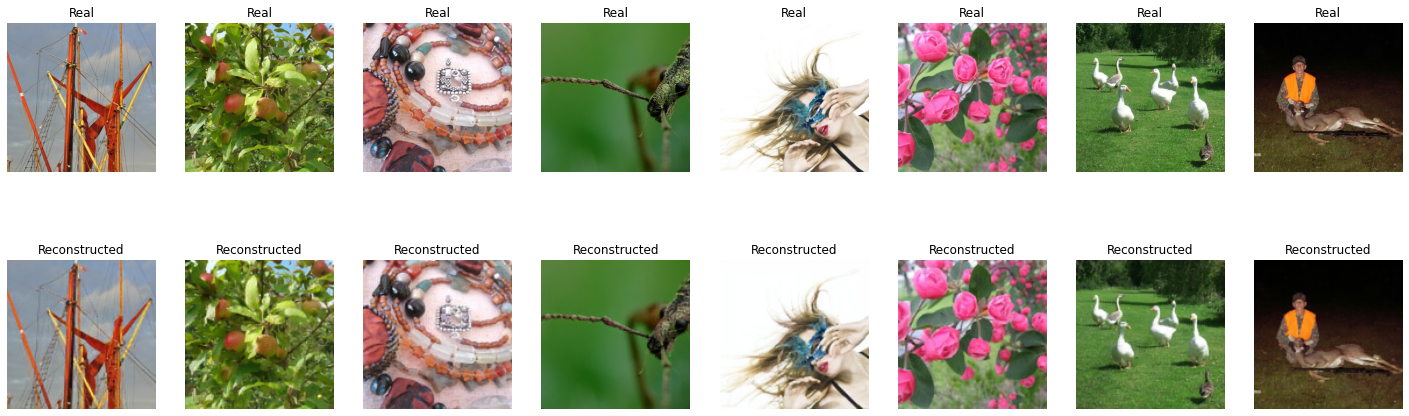

In [9]:
fig, ax = plt.subplots(2,8,figsize = (25,8))
for i in range(8):
    ax[0,i].imshow(val_images[i])
    ax[0,i].axis('off')
    ax[0,i].set_title('Real')
    ax[1,i].imshow(preds_dim_reduction[i])
    ax[1,i].axis('off')
    ax[1,i].set_title('Reconstructed')